## 1. The Type of Annotation
---

先看一个built-in annotation `@override` 的定义:

```java
@Target(ElementType.METHOD)
@Retention(RetentionPolicy.SOURCE)
public @interface Override {
}
```

注意定义上面的两个注解`@Target`, `@Retention`(我们自定义注解还得用到其它注解, 是不是很搞笑), 这两个是我们查看别的框架自定义的注解或者我们自定义注解的时候需要用到的, 其中`@Target`用来指明该注解的修饰目标, 比如上面的`@Target(ElementType.METHOD)`代表`@Override`只能修饰method, 否则编译器报错, 还有其它值比如`ElementType.FIELD`, `ElementType.TYPE`等. 

第二个`@Retention`指明了该注解的存在周期和作用, 也就是通过它我们可以猜出该注解的意图, 比如`RetentionPolicy.SOURCE`代表在编译期前有作用, 即用来提示我们的报错之类的, 比如built-in annotation`@Override`, `@SuppressWarnings`就是`RetentionPolicy.SOURCE`, 另外还有`RetentionPolicy.CLASS`, `RetentionPolicy.RUNTIME`, 其中retention policy为`RetentionPolicy.RUNTIME`的annotation会在运行期间存在, 一般和reflection结合使用. 


## 2. Built-in Annotations
---

There are some built-in annotations, like `@Override`, `@SuppressWarnings`, `@Deprecated`, and so on. I'll give some examples, 

First, if we write some codes like `ArrayList<String> arr = new ArrayList<>();`, and don't use it, the complier will complain about unused variable, so we can add an annotation to before this variable to tell the complier this, and there will be no warnings:

```java
@SuppressWarnings("unused")
ArrayList<String> arr = new ArrayList<>();
```

The **retention policy** of `@SuppressWarnings` is `SOURCE`, which means this annotation noly works before compile-time, just like the `include<>` or comments in c, which will be discarded by the complier. 

## 3. Omit Parameter of `Value`
---

当使用注解，仅给value属性赋值时，此时value属性可以省略，只写属性值。

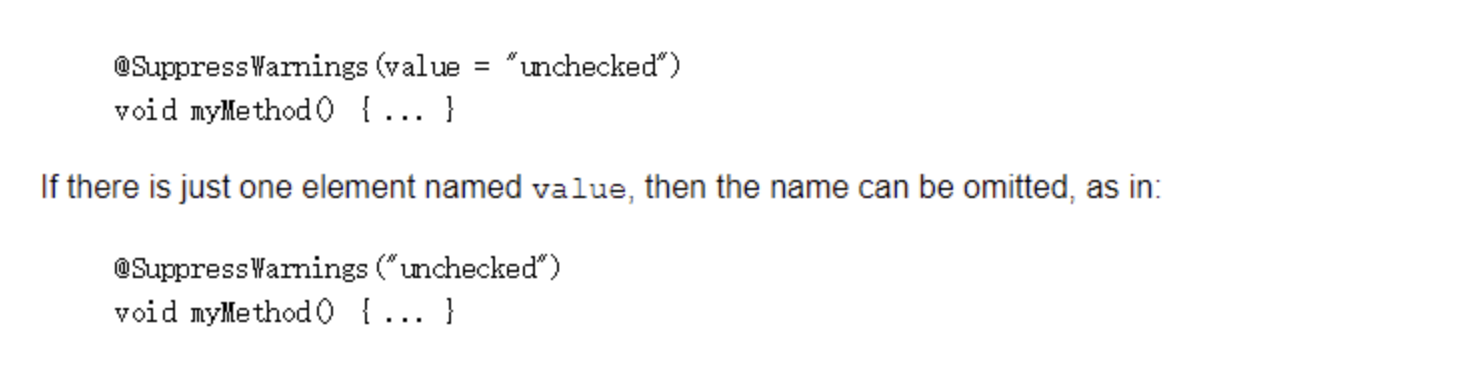

## 4. Example
----

## 4.1. 

如果你不知道什么是`cat.getClass()`和`MyAnnotation.class`, 请到`MyNotes/java/032 Reflection`相关的文章查看, 

```java
// MyAnnotation.java
import java.lang.annotation.ElementType;
import java.lang.annotation.Retention;
import java.lang.annotation.RetentionPolicy;
import java.lang.annotation.Target;

@Target(ElementType.TYPE)
@Retention(RetentionPolicy.RUNTIME)
public @interface MyAnnotation {

}

// Cat.java
@MyAnnotation
public class Cat {
    String name;

    Cat(String name) {
        this.name = name;
    }

    public void meow() {
        System.out.println("meow~");
    }
}

// Main.java
public class Main {
    public static void main(String[] args) {
        Cat cat = new Cat("kitty");
        if (cat.getClass().isAnnotationPresent(MyAnnotation.class)) {
            System.out.println("this class is annotated with MyAnnotation");
        } else {
            System.out.println("this class is not annotated with MyAnnotation");
        }
    }
}

// this class is annotated with MyAnnotation
```


### 4.2. 

```java
// RunManyTimes.java
import java.lang.annotation.ElementType;
import java.lang.annotation.Retention;
import java.lang.annotation.RetentionPolicy;
import java.lang.annotation.Target;

@Target(ElementType.METHOD)
@Retention(RetentionPolicy.RUNTIME)
public @interface RunManyTimes {
    int times() default 1;
}

// Cat.java
public class Cat {
    String name;

    Cat(String name) {
        this.name = name;
    }

    @RunManyTimes(times = 3)
    public void meow() {
        System.out.println("meow~");
    }

    public void sayHello() {
        System.out.println("hello~");
    }
}


// Main.java
import java.lang.reflect.InvocationTargetException;
import java.lang.reflect.Method;

public class Main {
    public static void main(String[] args) throws InvocationTargetException, IllegalAccessException {
        Cat cat = new Cat("kitty");
        for (Method method : cat.getClass().getDeclaredMethods()) {
            if (method.isAnnotationPresent(RunManyTimes.class)) {
                RunManyTimes annotation = method.getAnnotation(RunManyTimes.class);
                for (int i = 0; i < annotation.times(); ++i) {
                    method.invoke(cat);
                }
            }
        }
    }
}

// meow~
// meow~
// meow~
```